#  Régression polynomiale et régressions régularisées

In [57]:
#Librairies générales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Librairies regression polynomiale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Librairies regression Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

#Librairies regression Lasso
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#Librairies regression Elastic net
from sklearn.linear_model import ElasticNet

#Librairie d'optimisation de paramètres
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

## Régression polynomiale

### Générer les points de l'exemple

In [2]:
m = 100#Définition du nombre de points à représenter
X = np.linspace(-15, 15, m).reshape((m, 1))#Création des données X (linéaires) en y ajoutant un aléatoire
y = 0.11 * X**2 + X + 2 + np.random.randn(m,1)#Création des données polynomiales y 

#### Observations

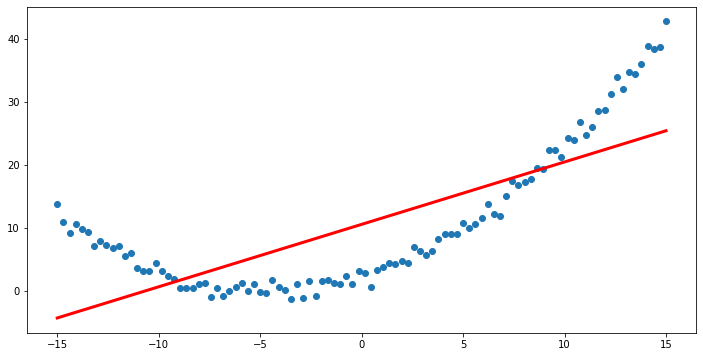

In [3]:
model = LinearRegression().fit(X, y)#Entrainement du modèle de regression linéaire
y_pred = model.predict(X)#Prédiction sur les données X

#Construction du graphique
plt.figure(figsize=(12,6))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

### Créer les données polynomiales

In [4]:
poly_feature = PolynomialFeatures(degree = 2, include_bias = False)#Création des polynômes de degré 2 pour les données d'apprentissage
X_poly = poly_feature.fit_transform(X)#Application de la création de polynômes aux données

### Entrainement du modèle

In [5]:
model = LinearRegression()
model.fit(X_poly, y)
print("Coefficient constant :", model.intercept_)
print("Coefficient X et X^2 : ", model.coef_)

Coefficient constant : [2.24392654]
Coefficient X et X^2 :  [[0.98913965 0.10850428]]


#### Observations

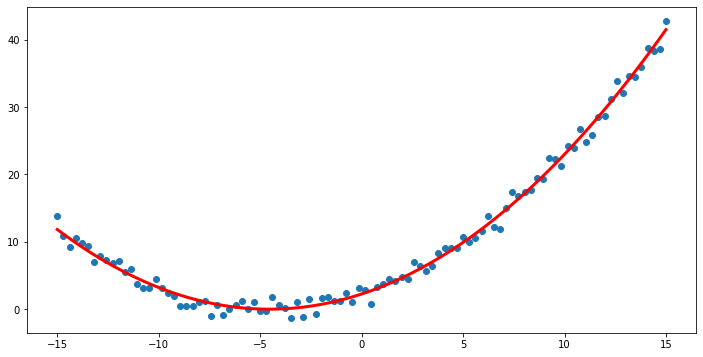

In [6]:
model = LinearRegression().fit(X_poly, y)#Entrainement du modèle sur les données polynomiales
y_pred = model.predict(X_poly)#Prédictions sur les données polynomiales

#Construction du graphique
plt.figure(figsize=(12,6))
plt.scatter(X, y)
plt.plot(X, y_pred, c='r', lw=3)

### Over-fitting & Under-fitting

#### Over-fitting

Cette partie consiste à créer des coeffcients de degré plus grand que le degré des vraies données.

In [29]:
m = 100
X = 6 * np.random.randn(m,1) - 3
y = 0.11 * X**2 + X + 2 + np.random.randn(m,1)

In [30]:
poly_feature = PolynomialFeatures(degree = 14, include_bias = False)
X_poly = poly_feature.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [31]:
X_test = np.linspace(-15, 10, 10000)
y_test = model.intercept_
puissance = 1
for i in model.coef_[0]:
    y_test = y_test + i * X_test**(puissance)
    puissance+=1

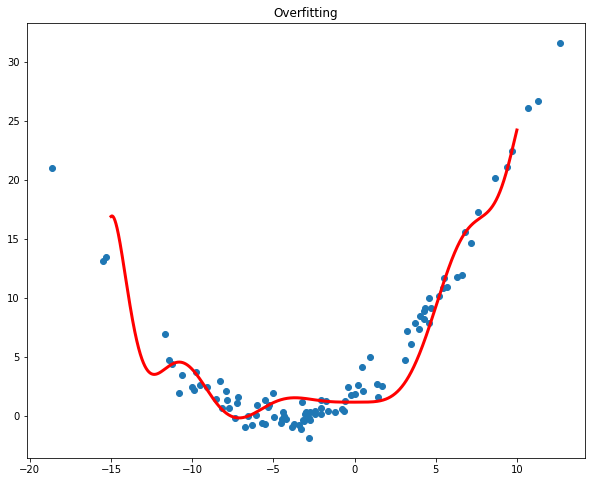

In [32]:
plt.figure(figsize=(10,8))
plt.title("Overfitting")
plt.scatter(X,y)
plt.plot(X_test, y_test,c='r', lw=3)

#### Under-fitting

Inversement, on va créer des données polynomiales de degré inférieur au degré des données réelles.

In [11]:
poly_feature = PolynomialFeatures(degree = 1, include_bias = False)
X_poly = poly_feature.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [12]:
X_test = np.linspace(-15, 10, 10000)#Création de 10.000 point dans l'intervalle [-15, 10]
y_test = model.intercept_#Coefficient constant
puissance = 1
for i in model.coef_[0]:
    y_test = y_test + i * X_test**(puissance)
    puissance+=1

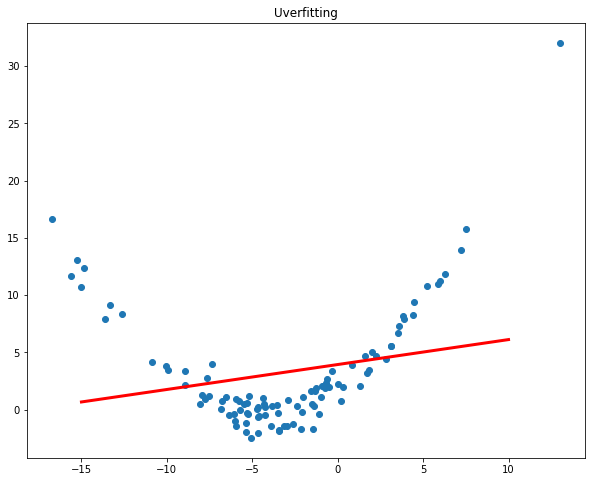

In [13]:
plt.figure(figsize=(10,8))
plt.title("Uverfitting")
plt.scatter(X,y)
plt.plot(X_test, y_test,c='r', lw=3)

## Les modèles régularisés

In [14]:
data = pd.read_csv("student.csv", sep=";")
data = data.select_dtypes(exclude=['object'])#Filtration des variables qualitatives

#### Préparation du dataset

On défini les variables cibles et explicatives, puis on réparti les données dans un set de test et d'entrainement

In [48]:
y = data['G3']#Variable cible
X = data.drop(columns=['G3'], axis=1)#Variables explicatives

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)#On met 20% des données dans le set de test

### Le modèle Ridge

In [62]:
ridge = Ridge(alpha=1, solver="auto")#Algorithme Ridge, avec alpha = 1 et un choix de solveur automatique, qui s'adaptera en fonction des données
 
ridge.fit(X_train, y_train)#Entrainement du modèle
ridge_pre = ridge.predict(X_test)#Prédictions
print('Résultat de l\'évaluation : {}'.format(mean_squared_error(y_test, ridge_pre)))#Résultat de performance

Résultat de l'évaluation : 2.2022778882167064


#### Optimisation

In [63]:
valeurs_alpha = np.linspace(0, 10, 15)
parameters = {'alpha': valeurs_alpha}

grid = GridSearchCV(ridge,parameters, cv=5)
grid.fit(X,y)

print("Valeur alpha donnant les meilleurs résultats : {}".format(grid.best_params_)) 

Valeur alpha donnant les meilleurs résultats : {'alpha': 10.0}


### Le modèle Lasso

In [74]:
lasso = Lasso(alpha=1)#Appel de la fonction avec alpha = 1

lasso.fit(X_train, y_train)#Entraienement sur les données
lasso_pre = lasso.predict(X_test)#Prédiction sur les données tests
print('Résultat de l\'évaluation : {}'.format(mean_squared_error(y_test, lasso_pre)))#Résultat de performance

Résultat de l'évaluation : 1.9040970758451776


In [75]:
valeurs_alpha = np.linspace(0, 10, 15)
parameters = {'alpha': valeurs_alpha}

grid = GridSearchCV(lasso, parameters, cv=5)
grid.fit(X,y)

print("Valeur alpha donnant les meilleurs résultats : {}".format(grid.best_params_)) 

Valeur alpha donnant les meilleurs résultats : {'alpha': 0.7142857142857143}


#### La sélection de variables avec Lasso

#### Coefficients d'importance

In [18]:
lasso.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.02583957,  0.07246406,  0.99080363])

#### Sélection des variables importantes

In [19]:
selection = SelectFromModel(lasso, prefit=True)#Création du modèle de sélection 
X_selected = selection.transform(X_train)#Application du modèle sur les données
 
#On crée le dataframe avec la transformation des variables
selected_features = pd.DataFrame(selection.inverse_transform(X_selected),
                                 index=X_train.index,
                                 columns=X_train.columns)
 
selected_columns = selected_features.columns[selected_features.var() != 0]#On garde uniquement les variables les plus importantes, dont le coefficient est différent de zéro.

#### Visualisation  d'importance

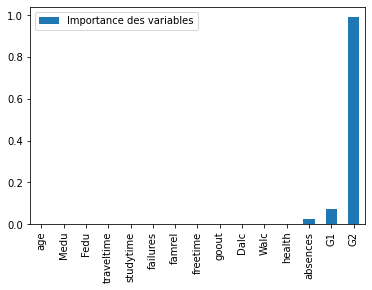

In [20]:
pd.DataFrame(lasso.coef_, index=X_train.columns).plot.bar()
plt.legend(['Importance des variables'])

### Le modèle Elastic net

In [56]:
elastic = ElasticNet(alpha=0.7142857142857143, l1_ratio= 0.9285714285714285)#Appel de la fonction avec alpha = 1 et le ration de mélange r = 0.5

elastic.fit(X_train, y_train)#Entraienement sur les données
elastic_pre = elastic.predict(X_test)#Prédiction sur les données tests
print('Résultat de l\'évaluation : {}'.format(mean_squared_error(y_test, elastic_pre)))#Résultat de performance

Résultat de l'évaluation : 1.9023467004028032


#### Optimisation

In [76]:
valeurs_alpha = np.linspace(0, 10, 15)
valeurs_l1_ration = np.linspace(0, 1, 15)

parameters = {'alpha':valeurs_alpha,
              'l1_ratio':valeurs_l1_ration}

grid = GridSearchCV(elastic, parameters, cv=5)
grid.fit(X,y)

print("Paramètres donnant les meilleurs résultats : {}".format(grid.best_params_)) 

Paramètres donnant les meilleurs résultats : {'alpha': 0.7142857142857143, 'l1_ratio': 0.9285714285714285}
